In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Q1 : Load the dataset and display the first few rows. How many countries does the dataset have?

df = pd.read_csv("https://drive.google.com/uc?export=download&id=1n9-phtU5QZLBtI4W6eGPrl8ZLZA9_z0Z") 
df.head()

,country,year,population,continent,life_exp,gdp_cap
0,Afghanistan,1952,8425333,Asia,28.801,779.445314
1,Afghanistan,1957,9240934,Asia,30.332,820.853030
2,Afghanistan,1962,10267083,Asia,31.997,853.100710
3,Afghanistan,1967,11537966,Asia,34.020,836.197138
4,Afghanistan,1972,13079460,Asia,36.088,739.981106


In [6]:
# How many countries does the dataset have?

noofcountry = df["country"].nunique()
noofcountry

142

In [8]:
# Check for null values
df.isnull().sum()

country       0
year          0
population    0
continent     0
life_exp      0
gdp_cap       0
dtype: int64

In [10]:
df.shape

(1704, 6)

In [12]:
# Q2 : Create a pivot table that shows the average life expectancy for each continent and year. 
# Index by 'continent', use 'year' as columns, and 'life_exp' as values.

df_pivot = pd.pivot_table(data = df,index="continent",columns="year",values="life_exp",aggfunc="mean",fill_value=0)
df_pivot


year,1952,1957,1962,1967,1972,1977,1982,1987,1992,1997,2002,2007
continent,,,,,,,,,,,,
Africa,39.135500,41.266346,43.319442,45.334538,47.450942,49.580423,51.592865,53.344788,53.629577,53.598269,53.325231,54.806038
Americas,53.279840,55.960280,58.398760,60.410920,62.394920,64.391560,66.228840,68.090720,69.568360,71.150480,72.422040,73.608120
Asia,46.314394,49.318544,51.563223,54.663640,57.319269,59.610556,62.617939,64.851182,66.537212,68.020515,69.233879,70.728485
Europe,64.408500,66.703067,68.539233,69.737600,70.775033,71.937767,72.806400,73.642167,74.440100,75.505167,76.700600,77.648600
Oceania,69.255000,70.295000,71.085000,71.310000,71.910000,72.855000,74.290000,75.320000,76.945000,78.190000,79.740000,80.719500


In [14]:
# Q3 : Which countries had a GDP per capita higher than the 75th percentile in 2007?

# Fetch Data for year 2007
df_2007yr = df[df["year"] == 2007]
# df_2007yr

# 75th percentile in 2007

df_gdp75 = df_2007yr["gdp_cap"].quantile(0.75)
# df_gdp75

# here df_gdp75 = 18008.835639999998 of 75th percentile

# countries having gdp higher than 75th percentile in 2007

no_of_countries = df_2007yr[df_2007yr["gdp_cap"] > df_gdp75]["country"].unique()
no_of_countries

array(['Australia', 'Austria', 'Bahrain', 'Belgium', 'Canada',
       'Czech Republic', 'Denmark', 'Finland', 'France', 'Germany',
       'Greece', 'Hong Kong, China', 'Hungary', 'Iceland', 'Ireland',
       'Israel', 'Italy', 'Japan', 'Korea, Rep.', 'Kuwait', 'Netherlands',
       'New Zealand', 'Norway', 'Oman', 'Portugal', 'Puerto Rico',
       'Saudi Arabia', 'Singapore', 'Slovak Republic', 'Slovenia',
       'Spain', 'Sweden', 'Switzerland', 'Taiwan', 'United Kingdom',
       'United States'], dtype=object)

In [16]:
# Q4 :Categorize the 'life_exp' into 4 equally ranged bins from 'Low' to 'Very High'. 
# Use cut to create these categorical life expectancy groups and add them as a new column 'Life_Exp_Range'.

labels = ["Low","Medium","High","Very High"]
df["Life_Exp_Range"] = pd.cut(df["life_exp"],bins=4,labels=labels)
df.head(10)



,country,year,population,continent,life_exp,gdp_cap,Life_Exp_Range
0,Afghanistan,1952,8425333,Asia,28.801,779.445314,Low
1,Afghanistan,1957,9240934,Asia,30.332,820.853030,Low
2,Afghanistan,1962,10267083,Asia,31.997,853.100710,Low
3,Afghanistan,1967,11537966,Asia,34.020,836.197138,Low
4,Afghanistan,1972,13079460,Asia,36.088,739.981106,Low
5,Afghanistan,1977,14880372,Asia,38.438,786.113360,Medium
6,Afghanistan,1982,12881816,Asia,39.854,978.011439,Medium
7,Afghanistan,1987,13867957,Asia,40.822,852.395945,Medium
8,Afghanistan,1992,16317921,Asia,41.674,649.341395,Medium
9,Afghanistan,1997,22227415,Asia,41.763,635.341351,Medium


Text(0, 0.5, 'Country')

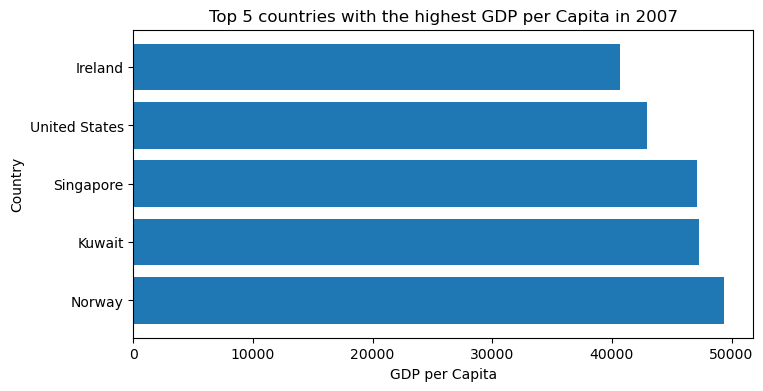

In [18]:
# Q5 : Identify the top 5 countries with the highest GDP per capita in 2007. 
# Use a horizontal bar chart to display this data.

df_2007 = df[df["year"] == 2007].sort_values(by="gdp_cap",ascending=False)
chart = df_2007[["country","gdp_cap"]].head()
#chart

# plot the chart
plt.figure(figsize=(8,4))
x_axis = chart["country"]
y_axis = chart["gdp_cap"]
plt.barh(x_axis,y_axis)
plt.title("Top 5 countries with the highest GDP per Capita in 2007")
plt.xlabel("GDP per Capita")
plt.ylabel("Country")

In [20]:
# Q6 : Find all country names that start with "I" and end with "a" using regex.

df_country_I_a = df[df["country"].str.contains(r'^I.*a$',regex=True)]["country"]
df_country_I_a.unique()

array(['India', 'Indonesia'], dtype=object)

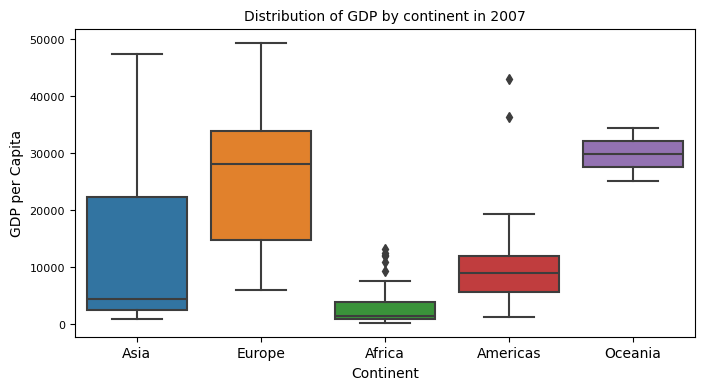

In [22]:
# Q7 : Create a boxplot using Seaborn to compare the distribution of GDP 
# per capita for each continent in 2007.

# df_2007yr
plt.figure(figsize=(8,4))
sns.boxplot(x="continent",y="gdp_cap",data=df_2007yr)
plt.yticks(fontsize=8)
plt.xlabel("Continent")
plt.ylabel("GDP per Capita")
plt.title("Distribution of GDP by continent in 2007",fontsize=10)
plt.show()

In [24]:
# Q8 : Find all countries with a life expectancy of over 80 years in 2007. 
# List these countries and their respective continents.

df_life_exp_over80 = df_2007yr[df_2007yr["life_exp"] > 80]

list_of_countries = df_life_exp_over80[["country","continent"]]
list_of_countries

,country,continent
71,Australia,Oceania
251,Canada,Americas
539,France,Europe
671,"Hong Kong, China",Asia
695,Iceland,Europe
767,Israel,Asia
779,Italy,Europe
803,Japan,Asia
1103,New Zealand,Oceania
1151,Norway,Europe


In [32]:
# Q9 : Convert the 'year' column to a datetime type and extract the decade. 
# Create a new column 'Decade' that groups the years into decades (e.g., the 1950s, 1960s).

df["year"] = pd.to_datetime(df["year"],format="%Y")

df["Decade"] = ((df["year"].dt.year // 10 )*10)

df['Decade'] = df['Decade'].astype(str) + 's'

df

,country,year,population,continent,life_exp,gdp_cap,Life_Exp_Range,Decade
0,Afghanistan,1952-01-01,8425333,Asia,28.801,779.445314,Low,1950s
1,Afghanistan,1957-01-01,9240934,Asia,30.332,820.853030,Low,1950s
2,Afghanistan,1962-01-01,10267083,Asia,31.997,853.100710,Low,1960s
3,Afghanistan,1967-01-01,11537966,Asia,34.020,836.197138,Low,1960s
4,Afghanistan,1972-01-01,13079460,Asia,36.088,739.981106,Low,1970s
...,...,...,...,...,...,...,...,...
1699,Zimbabwe,1987-01-01,9216418,Africa,62.351,706.157306,High,1980s
1700,Zimbabwe,1992-01-01,10704340,Africa,60.377,693.420786,High,1990s
1701,Zimbabwe,1997-01-01,11404948,Africa,46.809,792.449960,Medium,1990s
1702,Zimbabwe,2002-01-01,11926563,Africa,39.989,672.038623,Medium,2000s


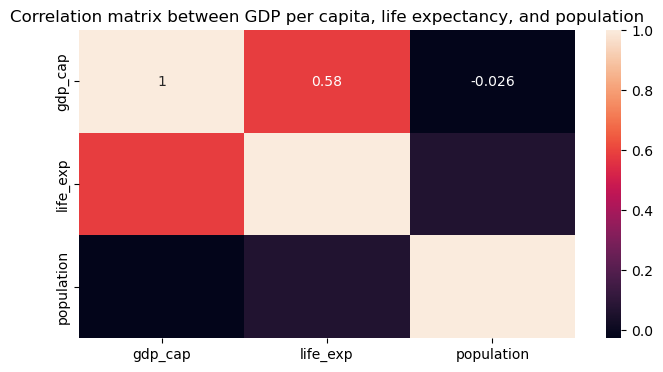

In [34]:
# Q10 : Compute the correlation matrix between GDP per capita, life expectancy, 
# and population for the dataset.Then, use Seaborn to visualize this correlation 
# matrix as a heatmap.

correlation_matrix = df[["gdp_cap","life_exp","population"]].corr()

# correlation_matrix

plt.figure(figsize=(8,4))
sns.heatmap(correlation_matrix,annot=True)
plt.title("Correlation matrix between GDP per capita, life expectancy, and population")
plt.show()


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


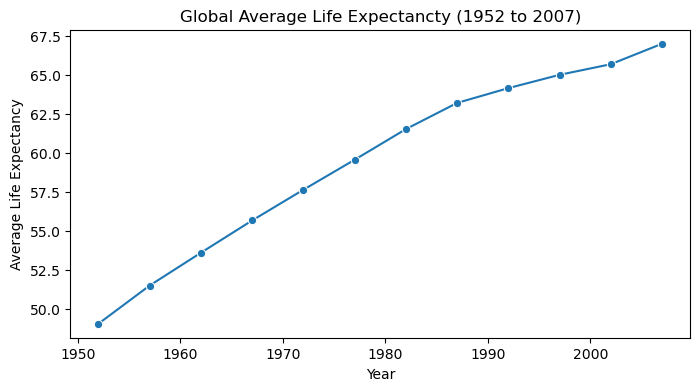

In [36]:
# Q11 : How has the global average life expectancy changed from 1952 to 2007? 
# Plot a line graph to visualize this trend.

life_ex_df = df.groupby("year")["life_exp"].mean().reset_index()

plt.figure(figsize=(8,4))
sns.lineplot(x="year",y="life_exp",data=life_ex_df,marker="o")
plt.xlabel("Year")
plt.ylabel("Average Life Expectancy")
plt.title("Global Average Life Expectancty (1952 to 2007)")
plt.show()




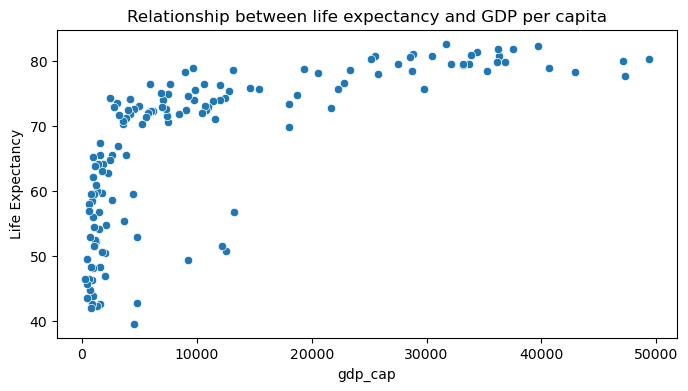

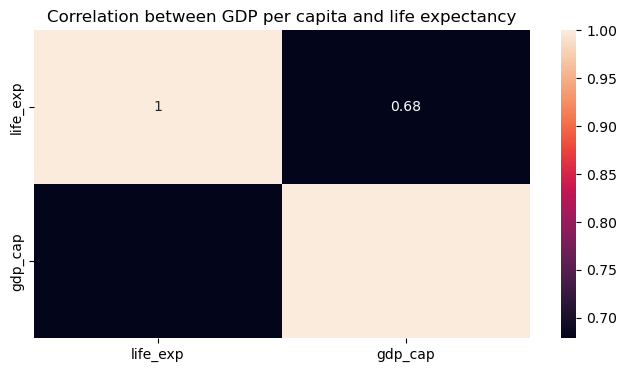

In [38]:
# Q12 : For the year 2007, analyze the relationship between life expectancy and GDP per capita.

# df_2007

plt.figure(figsize=(8,4))
sns.scatterplot(x="gdp_cap",y="life_exp",data=df_2007)
plt.xlabel("gdp_cap")
plt.ylabel("Life Expectancy")
plt.title("Relationship between life expectancy and GDP per capita")
plt.show() 

# correlation

corr_df = df_2007[["life_exp","gdp_cap"]].corr()
plt.figure(figsize=(8,4))
sns.heatmap(corr_df,annot=True)
plt.title("Correlation between GDP per capita and life expectancy")
plt.show()


<BarContainer object of 5 artists>

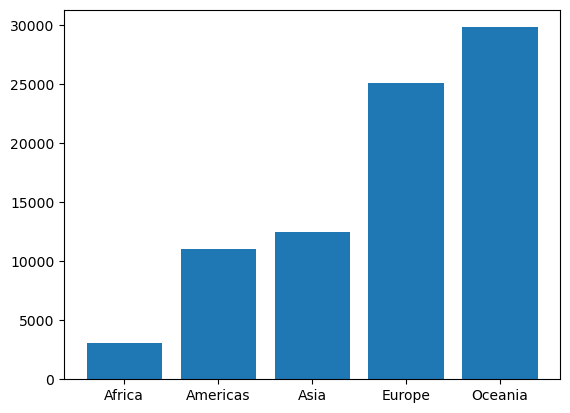

In [40]:
# Q13 : Compare the average GDP per capita for each continent in the year 2007.
# Use a bar chart for this comparison.
# df_2007
avg_gdp = df_2007.groupby("continent")["gdp_cap"].mean()
avg_gdp
x_bar = avg_gdp.index
y_bar = avg_gdp
plt.bar(x_bar,y_bar)

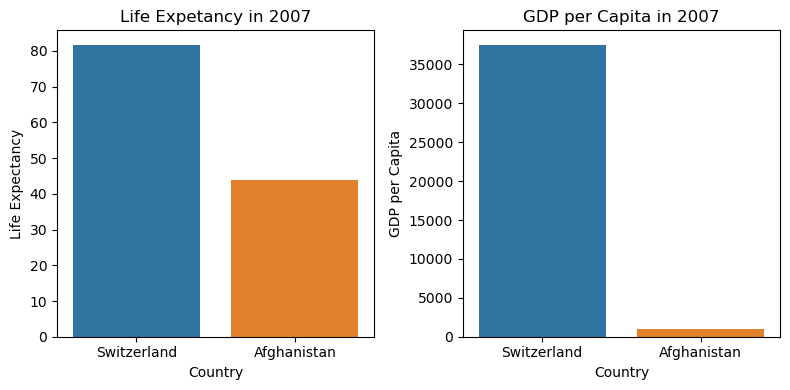

In [42]:
# Q14 :Compare the life expectancy and GDP per capita of Afghanistan 
# (a country known for its historical conflicts) and Switzerland 
# (representing a peaceful and economically prosperous country) 
# using the dataset provided.

# for the year 2007, use a bar chart to directly compare the 
# life expectancy and GDP per capita between these two countries.
# df_2007
afghnistan_switzerland_df = df_2007[df_2007["country"].isin(["Afghanistan","Switzerland"])]
afghnistan_switzerland_df

fig,axes = plt.subplots(1,2,figsize=(8,4))

# Chart for life expectancy
sns.barplot(x="country",y="life_exp",data=afghnistan_switzerland_df,ax=axes[0])
axes[0].set_title("Life Expetancy in 2007")
axes[0].set_ylabel("Life Expectancy")
axes[0].set_xlabel("Country")

# Chart for GDP per capita
sns.barplot(x="country",y="gdp_cap",data=afghnistan_switzerland_df,ax=axes[1])
axes[1].set_title("GDP per Capita in 2007")
axes[1].set_ylabel("GDP per Capita")
axes[1].set_xlabel("Country")

plt.tight_layout()
plt.show()


In [44]:
# create two separate line graphs to show the trends of these 
# two metrics over all available years in the dataset for both countries.

df_countries = df[df["country"].isin(["Afghanistan","Switzerland"])]
df_countries.head()

,country,year,population,continent,life_exp,gdp_cap,Life_Exp_Range,Decades
0,Afghanistan,1952-01-01,8425333,Asia,28.801,779.445314,Low,1950
1,Afghanistan,1957-01-01,9240934,Asia,30.332,820.853030,Low,1950
2,Afghanistan,1962-01-01,10267083,Asia,31.997,853.100710,Low,1960
3,Afghanistan,1967-01-01,11537966,Asia,34.020,836.197138,Low,1960
4,Afghanistan,1972-01-01,13079460,Asia,36.088,739.981106,Low,1970


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


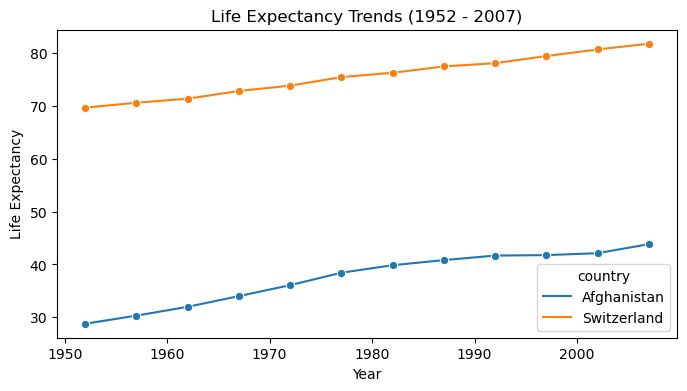

In [46]:
# Graph for Life Expectancy
plt.figure(figsize=(8,4))
sns.lineplot(x="year",y="life_exp",hue="country",data=df_countries,marker="o")
plt.title("Life Expectancy Trends (1952 - 2007)")
plt.xlabel("Year")
plt.ylabel("Life Expectancy")
plt.show()


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


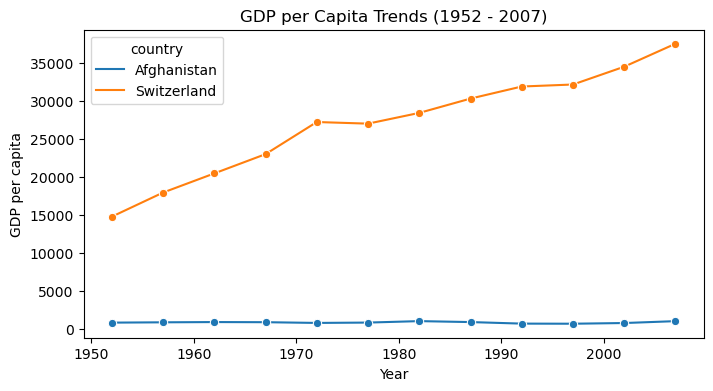

In [48]:
# Graph for gdp per capita
plt.figure(figsize=(8,4))
sns.lineplot(x="year",y="gdp_cap",hue="country",data=df_countries,marker="o")
plt.title("GDP per Capita Trends (1952 - 2007)")
plt.xlabel("Year")
plt.ylabel("GDP per capita")
plt.show()